In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xml.etree.ElementTree as ET
import tkinter as tk
import seaborn as sns
import plotly.express as px
import tensorflow 
from tkinter import ttk
from tkinter import filedialog
from tkinter import messagebox
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error   
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense

LECTURA DATA SET 

In [11]:
import pandas as pd

def leer_excel(ruta_archivo):
    try:
        # Lee el archivo de Excel
        datos = pd.read_excel(ruta_archivo, engine='openpyxl')
        
        # Imprime los datos en pantalla
        print("Contenido del archivo de Excel:")
        print(datos)
        
        return datos
    
    except Exception as e:
        print(f"Error al leer el archivo: {e}")
        return None

# Ejemplo de uso de la función
archivo_excel = "DataNovenoProcesamientoVx.xlsx"
datos = leer_excel(archivo_excel)


Contenido del archivo de Excel:
       Ruta  Hora  Dia  Cond_Ruta  #Veh_Disp_x_rut  demanda  DistRut_Km  \
0         1     3    3          1                5        2       13.61   
1         1     3    3          2                5        2       13.61   
2         1     3    3          3                5        2       13.61   
3         1     3    3          1                5        2       13.61   
4         1     3    3          2                5        2       13.61   
...     ...   ...  ...        ...              ...      ...         ...   
25699    68     1    1          2                2        1       17.78   
25700    68     1    1          3                2        1       17.78   
25701    68     1    1          1                2        1       17.78   
25702    68     1    1          2                2        1       17.78   
25703    68     1    1          3                2        1       17.78   

       TimeRuta  PromPasDia  
0            28        1566  
1      

Min Max para normalizar 

In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Cargar el archivo Excel
archivo_excel = "DataNovenoProcesamientoVx.xlsx"
data = pd.read_excel(archivo_excel)

# Definir los rangos específicos para cada columna
rangos = {
    "Ruta": (1, 60),
    "Hora": (1, 3),
    "Dia": (1, 3),
    "Cond_Ruta": (1, 3),
    "#Veh_Disp_x_rut": (2, 4),
    "demanda": (1, 3),
    "DistRut_Km": (7, 22.6),
    "TimeRuta": (11, 55),
    "PromPasDia":(72, 4884)
}

# Normalizar las columnas utilizando Min-Max
scaler = MinMaxScaler()

for columna, (min_valor, max_valor) in rangos.items():
    columna_data = data[[columna]].values.reshape(-1, 1)
    data[columna] = scaler.fit_transform(columna_data) * (max_valor - min_valor) + min_valor

# Guardar los datos normalizados en un nuevo archivo Excel
data.to_excel("DataDecimoProcesamientoVx_Normalizado.xlsx", index=False)


In [13]:
# Muestra las primeras filas del DataFrame para verificar la normalización de #Veh_x_rut
print(datos.head())

   Ruta  Hora  Dia  Cond_Ruta  #Veh_Disp_x_rut  demanda  DistRut_Km  TimeRuta  \
0     1     3    3          1                5        2       13.61        28   
1     1     3    3          2                5        2       13.61        28   
2     1     3    3          3                5        2       13.61        28   
3     1     3    3          1                5        2       13.61        28   
4     1     3    3          2                5        2       13.61        28   

   PromPasDia  
0        1566  
1        1566  
2        1566  
3        1566  
4        1566  


SEPARACION DE CARACTERISTICAS Y ETIQUETAS

In [14]:
from sklearn.model_selection import StratifiedKFold
# Se define el número de folds para la validación cruzada
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
X = datos[['Ruta', 'Hora', 'Dia', 'Cond_Ruta', '#Veh_Disp_x_rut', "DistRut_Km",	"TimeRuta","PromPasDia"]]
Y = datos['demanda']  



NORMALIZACÍON DE LOS DATOS (Metodo "Z-SCORE"):

 Esta técnica escala los datos para que tengan la propiedad de una distribución normal estándar con media 0 y desviación estándar 1

In [15]:
# Crear un objeto StandardScaler
#scaler = StandardScaler()

# Normalizar los datos utilizando Z-score
#X_norm = scaler.fit_transform(X)




DIVISION DE DATOS: Validacion Cruzada k=

In [16]:

# Se inicializa una lista para almacenar los porcentajes de pérdida en cada fold
porcentajes_perdida = []
from sklearn.model_selection import train_test_split
# Itera sobre los folds de la validación cruzada
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

#X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=42)

FASE DE DISEÑO DE LA MLP  

In [26]:

model = Sequential()
#Se agrega capa inicial con 5 Neuronas funcion de activacion " sigmoid "
model.add(Dense(units=8, input_dim=8 , activation='relu'))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=1, activation='relu'))

# Crea un optimizador Adam con  tasa de aprendizaje = 0.01
custom_optimizer = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=custom_optimizer, metrics=['accuracy'])

##model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test))
model.fit(X_train, Y_train, epochs=1000, batch_size=32, verbose=0)

#Se Guarda el porcentaje de perdida para graficar  

history = model.fit(X_train, Y_train, epochs=1000, batch_size=32, validation_data=(X_test, Y_test))




In [18]:
# Evalúa el modelo y calcula el error cuadrático medio
predictions = model.predict(X_test)
mse = mean_squared_error(Y_test, predictions)   
# Calcula y almacena el porcentaje de pérdida para este fold
rango_etiquetas = 3 - 1
porcentaje_perdida = (mse / rango_etiquetas) * 100
porcentajes_perdida.append(porcentaje_perdida)

# Calcula y muestra el promedio del porcentaje de pérdida en los 5 folds
promedio_perdida = sum(porcentajes_perdida) / len(porcentajes_perdida)
print(f"Porcentaje de error promedio en los 5 folds: {promedio_perdida:.2f}%")

161/161 [==============================] - 2s 8ms/step
Porcentaje de error promedio en los 5 folds: 28.92%


FASE DE PRODUCCION 

In [19]:
loss = model.evaluate(X_test, Y_test)
# Calcular el porcentaje de pérdida
rango_etiquetas = 3 - 1  # Rango de las etiquetas (de 1 a 3 en este caso)
 # Calcular el porcentaje de pérdida
porcentaje_perdida = (loss[0] / rango_etiquetas) * 100
#porcentaje_perdida = (loss / rango_etiquetas) * 100

# Mostrar el porcentaje de pérdida
print(f"Porcentaje de error en el conjunto de prueba: {porcentaje_perdida:.2f}%")


161/161 [==============================] - 1s 8ms/step - loss: 0.5783 - accuracy: 0.4117
Porcentaje de error en el conjunto de prueba: 28.92%


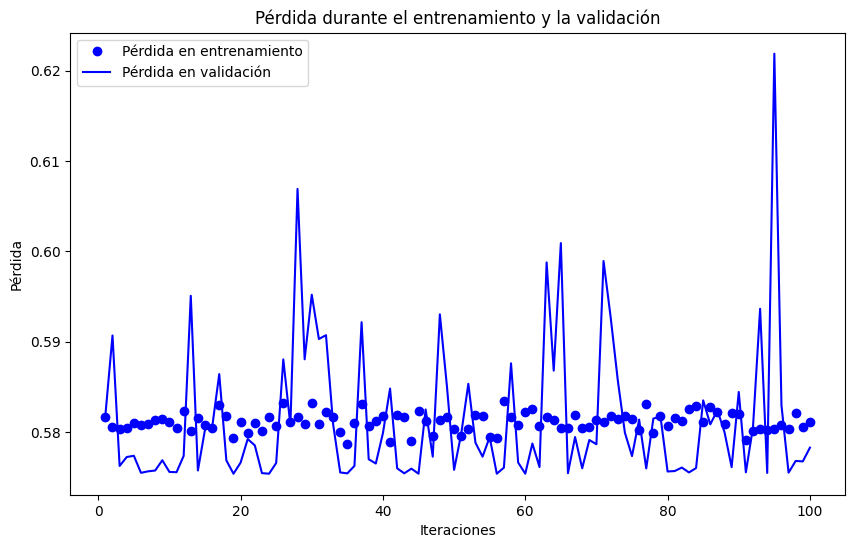

In [20]:
# Obtener la pérdida del historial de entrenamiento
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crear un gráfico de línea para mostrar la pérdida durante el entrenamiento
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo', label='Pérdida en entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


161/161 [==============================] - 1s 5ms/step


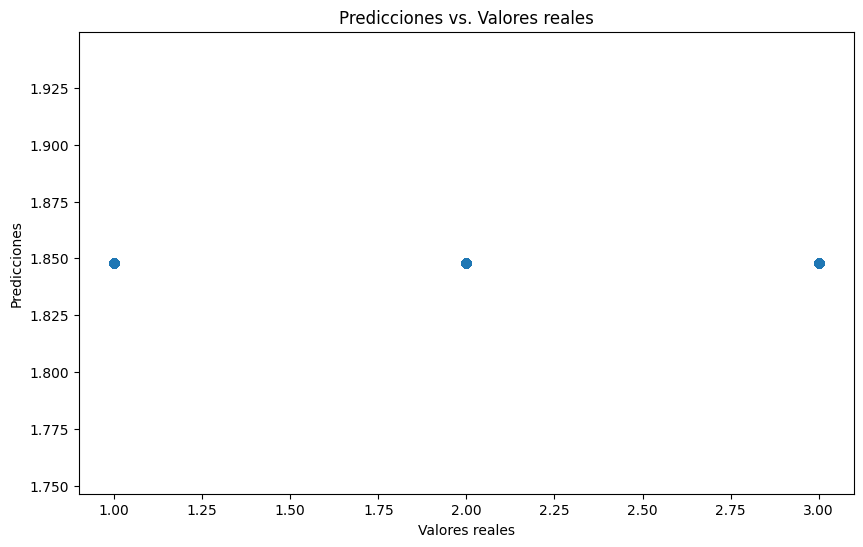

In [21]:
predictions = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores reales')
plt.show()

161/161 [==============================] - 1s 5ms/step


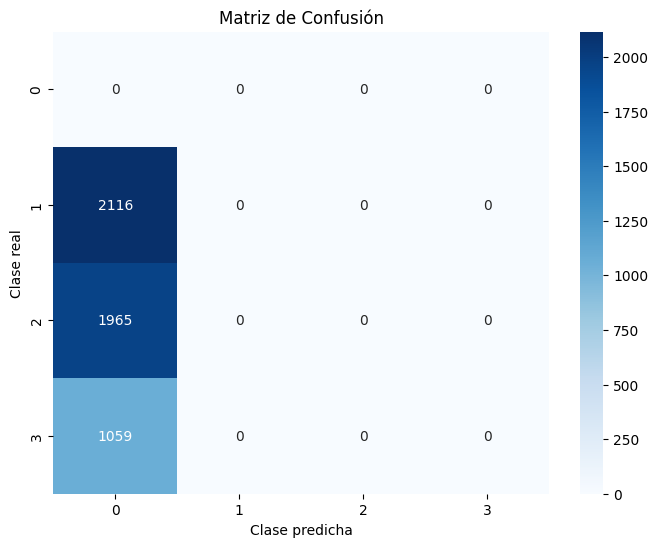

In [22]:
# Obtener las probabilidades de las clases del modelo
probabilidades = model.predict(X_test)

# Obtener las clases predichas
predictions = np.argmax(probabilidades, axis=1)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(Y_test, predictions)

# Crear un mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Clase predicha')
plt.ylabel('Clase real')
plt.title('Matriz de Confusión')
plt.show()

#matriz de confusión

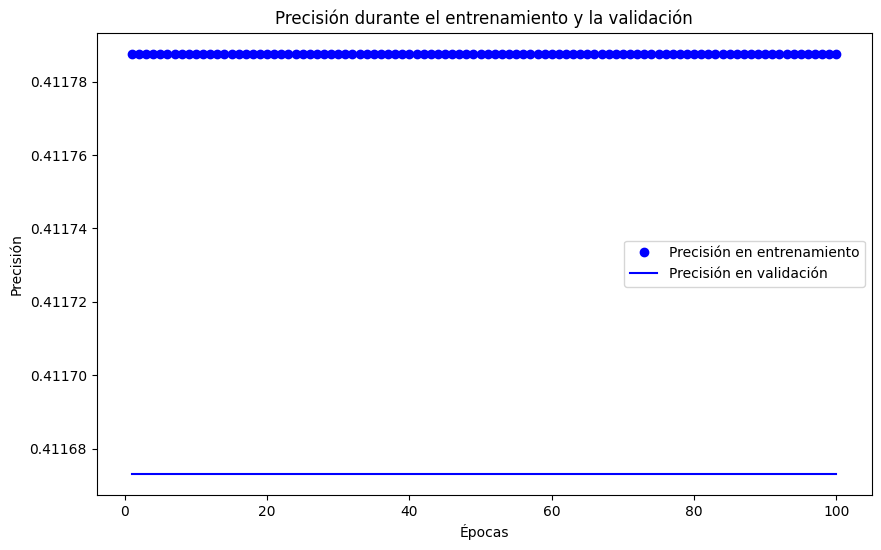

In [23]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, 'bo', label='Precisión en entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión en validación')
plt.title('Precisión durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()


INTERFACE GRAFICA 

In [24]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox

# Función para entrenar la red neuronal con los nuevos valores
def entrenar_red():
    try:
        num_capas_ocultas = int(entry_capas_ocultas.get())
        num_epocas = int(entry_epocas.get())
        eta = float(entry_eta.get())
        
        # Aquí puedes poner el código para entrenar la red neuronal con los nuevos valores
        
        messagebox.showinfo("Éxito", "Red neuronal entrenada con nuevos valores.")
    except Exception as e:
        messagebox.showerror("Error", f"Error: {str(e)}")

# Crear la ventana principal
root = tk.Tk()
root.title("Interfaz de Red Neuronal")

# Crear etiquetas y campos de entrada para los hiperparámetros
label_capas_ocultas = ttk.Label(root, text="Número de Capas Ocultas:")
label_capas_ocultas.pack()
entry_capas_ocultas = ttk.Entry(root)
entry_capas_ocultas.pack()

label_epocas = ttk.Label(root, text="Número de Épocas:")
label_epocas.pack()
entry_epocas = ttk.Entry(root)
entry_epocas.pack()

label_eta = ttk.Label(root, text="ETA:")
label_eta.pack()
entry_eta = ttk.Entry(root)
entry_eta.pack()

# Botón para entrenar la red neuronal
btn_entrenar = ttk.Button(root, text="Entrenar Red Neuronal", command=entrenar_red)
btn_entrenar.pack()

# Iniciar el bucle de la interfaz gráfica
root.mainloop()
